# Aptum2025

Diese Anwendung stellt die vollständigen Daten zum Artikel https://doi.org/10.46771/9783967694604_7 bereit.
Bitte zitieren Sie diese Quelle, wenn Sie die Daten verwenden wie folgt:
Samira Ochs und Jan Oliver Rüdiger (2025): Das Queere Korpus (QK): Vorstellung einer neuen Korpusressource und Beispielanalysen am Thema „Ehe für Alle“. Aptum. Zeitschrift für Sprachkritik und Sprachkultur 21, Nr. 01 (8. April): 141–162. doi:10.46771/9783967694604_7


## Hinweis (Notebook im Browser vs. Lokal)

Dieses Notebook läuft direkt in ihrem Web-Browser. Alle Python-Pakete sind als installiert. Wenn Sie den Code auf ihrem Rechner ausführen, kann es sein, dass Sie die Pakete selbst installieren müssen. Folgende Pakete sind erforderlich (requierements.txt):

numpy
matplotlib
plotly
plotly[express]
pandas
dayplot
pydantic
requests
nbformat

Sollten Sie Pakete frisch installiert haben, denken Sie bitte daran, dass Sie den Python-Kernel des Jupyter Notebooks einmal neu starten müssen, damit die installierten Pakete verfügbar sind.


## Hinweis (Internetverbindung / Daten im Browser)

Dieses Notebook lädt große Dateien vom Server und speichert diese direkt in ihrem Browser. Daher (1) stellen Sie bitte eine gute und stabile Internetverbindung sicher. (2) Die Daten werden längerfrist gespeichert (localStorage des Browsers). Bitte löschen Sie ggf. den Cache der Seite, um ggf. Dateien zu entfernen.


# Dependencies

Folgende Dependencies müssen einmalig nach dem Starten des Notebooks importiert werden. Bitte installieren Sie ggf. erforderliche Dependencies selbst.


In [1]:
from enum import IntEnum
from pydantic import BaseModel
import matplotlib.pyplot as plt
import requests
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import json
import os
import wordcloud

# Datenkatalog und Hilfsfunktionen

Dieser Code stellt (A) eine Überischt zu den verfügbaren Daten zusammen. (B) Erlaubt er den Download dieser Daten.


In [2]:
# Datenkatalog - Key = Korpus-Datenschnitt (group), Value = verfügbare Parquet-Dateien (method) mit unterschiedlichen Analysemethoden
catalog = {
 "byAudience": ["basic", "cooc", "frequ3", "ngram3", "ngram5", "ngram7"],
 "byCorpus": ["basic", "cooc", "frequ3", "ngram3", "ngram5", "ngram7"],
 "byCountry": ["basic", "cooc", "frequ3", "ngram3", "ngram5", "ngram7"],
 "byTime": ["basic", "cooc", "frequ3", "ngram3", "ngram5", "ngram7"],
 "byTimeCorpus": ["basic", "cooc", "frequ3", "ngram3", "ngram5", "ngram7"],
 "byTimeCorpus-REF": ["basic", "cooc", "frequ3", "ngram3", "ngram5", "ngram7"]
}

base_url = "https://www.owid.de/plus/static/aptum2025"

def get_data(group: str, method: str) -> pd.DataFrame:
    """
    Lädt die angeforderten Daten als Pandas DataFrame.
    
    :param group: Korpus-Datenschnitt (z.B. "byAudience" - siehe catalog) - byAudience = Zielgruppen, byCorpus = Quellen, byCountry = Länder, byTime = Zeit, byTimeCorpus = Zeit+Korpus (erlaubt Aufsplittung), byTimeCorpus-REF = Zeit+Korpus im DeReKo-Referenzkorpus (siehe Artikel)
    :param method: Analysemethode (z.B. "basic", "cooc", "frequ3", "ngram3", "ngram5", "ngram7") - basic = Grunddaten wie Dokumente/Token, cooc = Kookkurrenzen, frequ3 = Frequenz nach POS/Lemma/Wortform gesplittet, ngram3/5/7 = N-Gramme
    :return: Pandas DataFrame mit den angeforderten Daten
    """
    url = f"{base_url}/{group}/{method}.tsv"
    fn = f"{group}_{method}.tsv"
    
    if not os.path.exists(fn):
      print(f"Lade Datei '{fn}' vom Server...", end="")
      response = requests.get(url)
      with open(fn, "wb") as f:
        f.write(response.content)
      print(f"ok!")
    
    df = pd.read_csv(fn, sep="\t")
    return df

# Beispiele


## Gebe die Korpusgrößen (basic) für die unterschiedlichen Teilkorpora aus.


In [4]:
data = get_data("byCorpus", "basic")
filter = ["tokens", "sentences", "documents"]
data = data[data["param"].isin(filter)]
data["value"] = data["value"].astype(int)
print(data)

                             FILE      param    value
0             QK_XTRA_NEWS_ONLINE     tokens   790873
2             QK_XTRA_NEWS_ONLINE  sentences    55878
3             QK_XTRA_NEWS_ONLINE  documents       27
11   QK_LambdaNachrichten_Digital     tokens  2610459
13   QK_LambdaNachrichten_Digital  sentences   149554
..                            ...        ...      ...
310                   QK_SCHWULST  sentences    73264
311                   QK_SCHWULST  documents     1990
319                 LAMBDA-ONLINE     tokens   211675
321                 LAMBDA-ONLINE  sentences    17835
322                 LAMBDA-ONLINE  documents      576

[90 rows x 3 columns]


## Bestimme die 3 häufigsten NN (STTS: Normale Nomen) pro Land


In [26]:
data = get_data("byCountry", "frequ3")
data = data[data["POS"] == "NN"]
data = data.sort_values(by=["FILE", "Frequenz (relativ)"], ascending=[True, False])
data = data.groupby("FILE").head(5)
data.drop(columns=["POS", "Frequenz"], inplace=True)
print(data)

               FILE        Lemma         Wort  Frequenz (relativ)
839427  Deutschland            s            s         2079.334782
867046  Deutschland            t            t         1593.620392
840106  Deutschland       Mensch     Menschen         1234.123573
840668  Deutschland          Uhr          Uhr         1217.285474
857980  Deutschland            l            l         1125.084953
564672      Schweiz  https://gay  https://gay         1719.604080
423607      Schweiz       Mensch     Menschen         1610.245858
429662      Schweiz       LGBTI+       LGBTI+         1423.815271
427562      Schweiz   Mannschaft   MANNSCHAFT         1354.117391
423767      Schweiz         Jahr         Jahr         1159.682789
5862     Österreich            –            –         1954.585744
445      Österreich         HOSI         HOSI         1042.812203
87       Österreich       Mensch     Menschen          909.842133
179      Österreich        Lesbe       Lesben          778.952041
165      Ö

## Zeichne einen Frequenzverlauf für das Lemma "queer"


In [48]:
query = "queer"
layer = "Lemma" # Alternativ: "Wort" oder "POS"

data = get_data("byTime", "frequ3")
data["FILE"] = data["FILE"].astype(str)
data = data[data["FILE"] != "1"] # Entfernt Einträge ohne Zeitangabe
data = data[data[layer] == query]
data = data.groupby(['FILE']).agg({'Frequenz (relativ)': 'sum'}).reset_index()
data.sort_values(by="FILE", inplace=True)

# Erstelle Plotly-Liniendiagramm
fig = px.line(data, x="FILE", y="Frequenz (relativ)", title=f'Frequenzverlauf für "{query}" nach Zeit', labels={"FILE": "Zeit", "Frequenz (relativ)": "Frequenz (relativ)"})
fig.show()

## Suche nach Kookkurrenzen zu "schwul" in den unterschiedlichen Zielgruppen-Datenschnitten (byAudience)


In [59]:
query = "schwul"

data = get_data("byAudience", "cooc")
data = data[((data["Wort"] == query)|(data["Kookkurrenz"] == query))]
data.loc[data["Kookkurrenz"] == query, ["Wort", "Kookkurrenz"]] = data.loc[data["Kookkurrenz"] == query, ["Kookkurrenz", "Wort"]].values

data = data.sort_values(by=["FILE", "Signifikanz"], ascending=[True, False])
data = data.groupby("FILE").head(5)
print(data)

                     FILE    Wort   Kookkurrenz  Frequenz  Signifikanz
1072309          lesbisch  schwul      lesbisch       109    35.843715
1760957          lesbisch  schwul      lesbisch       109    35.843715
783696           lesbisch  schwul          oder        83    10.887806
1760922          lesbisch  schwul          oder        83    10.887806
1181935          lesbisch  schwul           ist       106     7.701603
3634227             queer  schwul      lesbisch       742   231.603266
4716982             queer  schwul      lesbisch       742   231.603266
3073483             queer  schwul          oder       737    62.234677
3634632             queer  schwul          oder       737    62.234677
3634235             queer  schwul     bisexuell       199    60.901288
2713102            schwul  schwul      lesbisch       277    74.351416
2800520            schwul  schwul      lesbisch       277    74.351416
2797939            schwul  schwul       geoutet       174    36.109058
280051

## Erstelle für die Kookkurrenzen zu "Ehe" in den Zielgruppen-Datenschnitten jeweils eine Wordcloud


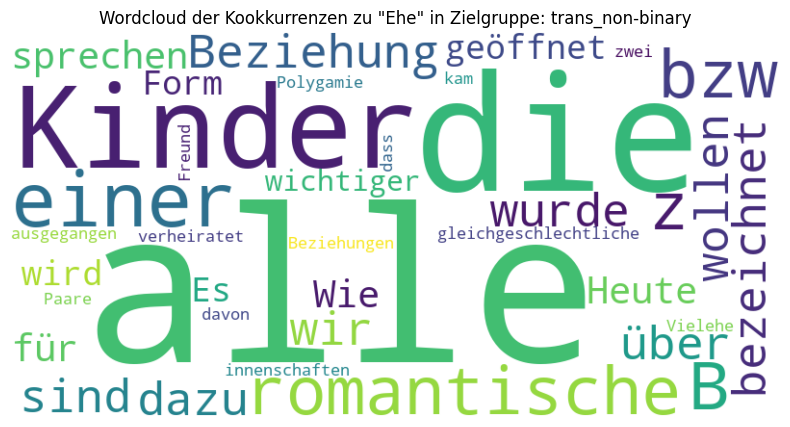

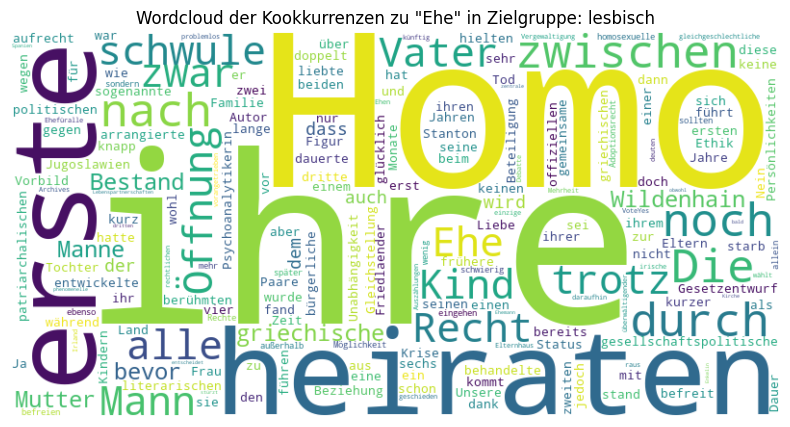

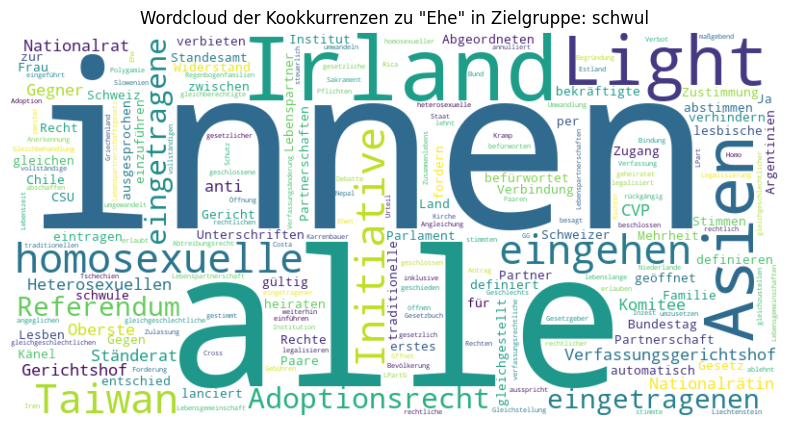

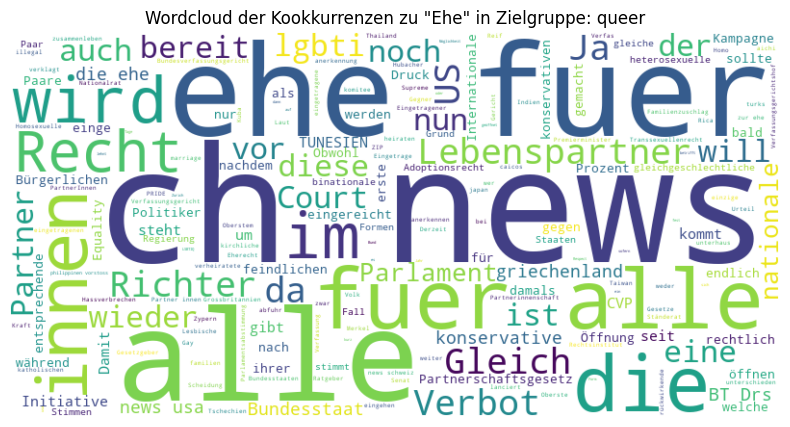

In [60]:
query = "Ehe"

data = get_data("byAudience", "cooc")
data = data[((data["Wort"] == query)|(data["Kookkurrenz"] == query))]
data.loc[data["Kookkurrenz"] == query, ["Wort", "Kookkurrenz"]] = data.loc[data["Kookkurrenz"] == query, ["Kookkurrenz", "Wort"]].values

audiences = data["FILE"].unique()
for audience in audiences:
    df_audience = data[data["FILE"] == audience]    
    text = " ".join(df_audience["Kookkurrenz"].tolist())
    
    wc = wordcloud.WordCloud(width=800, height=400, background_color="white").generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f'Wordcloud der Kookkurrenzen zu "{query}" in Zielgruppe: {audience}')
    plt.show()

## Was sind die zehn häufigsten 3-Gramme (N=3) in den Ländern


In [64]:
data = get_data("byCountry", "ngram3")

data = data.sort_values(by=["FILE", "Frequenz"], ascending=[True, False])
data = data.groupby("FILE").head(10)
print(data)

               FILE                  N-Gramm  Frequenz
333283  Deutschland                  , Tel :     14493
445647  Deutschland                    ( C )      8765
622240  Deutschland                    C ) ,      8754
327813  Deutschland               , die sich      7476
326438  Deutschland               , dass ich      7316
720712  Deutschland                    O T O      7221
671314  Deutschland          @ Phoenix Sauna      7133
720711  Deutschland                    F O T      6917
720713  Deutschland                    T O :      6631
326107  Deutschland               , dass die      6585
242184      Schweiz       — zuletzt geändert     13983
122667      Schweiz  ( MANNSCHAFT berichtete     12640
122668      Schweiz  MANNSCHAFT berichtete )     12023
248551      Schweiz           berichtete ) .     10307
87303       Schweiz               , dass die      5823
243254      Schweiz   00 GMT+2ArticleWatch :      4634
94091       Schweiz               , dass sie      4242
86996     